In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


## Definition
A time series is **non-stationary** if its statistical properties, such as mean and variance, change over time.
The **Augmented Dickey-Fuller (ADF) test** is a common method to check for unit roots and determine stationarity.

### Stationarity Conditions
A time series \( Y_t \) is stationary if:

1. $$ E[Y_t] = \mu $$ (Constant mean)
2. $$ V(Y_t) = \sigma^2 = E(Y_t - E(Y_t))^2 $$ (Constant variance)
3. $$ \text{Cov}(Y_t, Y_{t-h}) = E[(Y_t - \mu)(Y_{t-h} - \mu)] $$ depends only on \( h \), not \( t \) (Constant autocovariance)

### Augmented Dickey-Fuller (ADF) Test
The ADF test uses the regression:
$$
\Delta Y_t = \alpha + \beta t + \gamma Y_{t-1} + \sum_{i=1}^{p} \delta_i \Delta Y_{t-i} + \epsilon_t
$$
where:
- $$ H_0: \gamma = 0 $$ (unit root present, non-stationary)
- $$ H_1: \gamma < 0 $$ (stationary)
'''\) (stationary)
'''


In [2]:
# Generated Non-Stationary Time Series data - Simulated 
t = np.arange(50)
trend = 0.5 * t + np.random.normal(scale=5, size=50) 

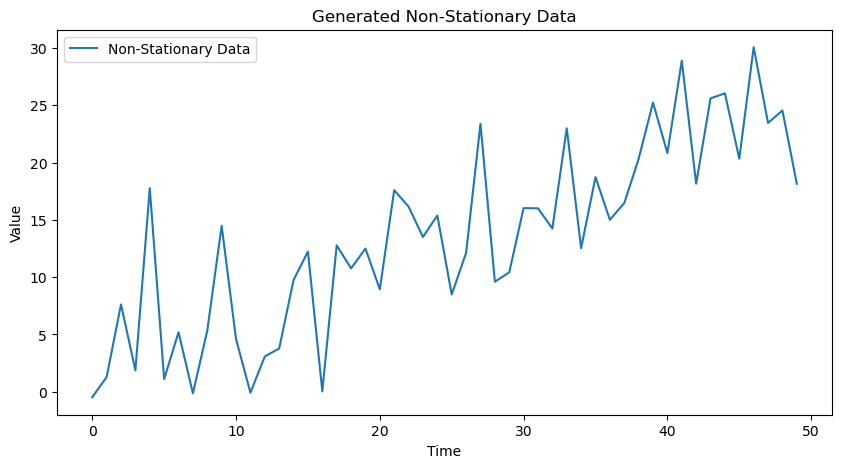

In [3]:
# Plotting the non-stationary series
plt.figure(figsize=(10, 5))
plt.plot(t, trend, label='Non-Stationary Data')
plt.title('Generated Non-Stationary Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [4]:
# Diagnosis: Augmented Dickey-Fuller (ADF) Test
ADF = adfuller(trend)
print("ADF Statistic:", ADF[0])
print("p-value:", ADF[1])
print("Critical Values:", ADF[4])

ADF Statistic: -0.05606153562179056
p-value: 0.9536428942624922
Critical Values: {'1%': -3.5885733964124715, '5%': -2.929885661157025, '10%': -2.6031845661157025}


'''
## Damage
Non-stationarity can cause spurious regressions, misleading statistical tests, and poor forecasting models.

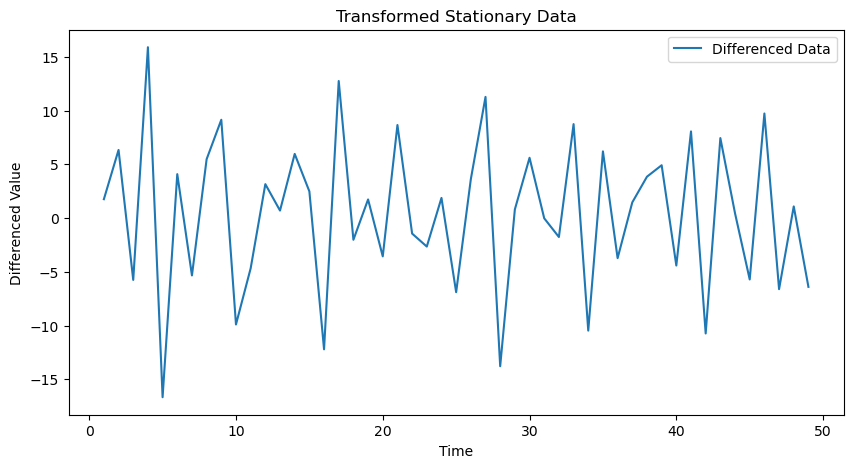

In [5]:
# Directions: Convert to a Stationary Series
# Differencing the data
dif_data = np.diff(trend)
plt.figure(figsize=(10, 5))
plt.plot(t[1:], dif_data, label='Differenced Data')
plt.title('Transformed Stationary Data')
plt.xlabel('Time')
plt.ylabel('Differenced Value')
plt.legend()
plt.show()


In [6]:
# Checking stationarity by performing ADF for the second time
final_adf = adfuller(dif_data)
print("ADF Statistic after differencing:", final_adf[0])
print("p-value after differencing:", final_adf[1])
print("Critical Values after differencing:", final_adf[4])

ADF Statistic after differencing: -3.640798427166056
p-value after differencing: 0.005027279543359253
Critical Values after differencing: {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}



## Conclusion
The ADF test after differencing has produced a lower p-value, indicating that the transformed series is now stationary.
